# Class Balancing using SMOTE(Synthetic Minority Oversampling Technique)

In [13]:
# import libraries
import numpy as np
import pandas as pd

      F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  ...    F136   F137    F138  \
0      0   0   0   0   0   0   0   0   0    0  ...  3.7730  2.704  119.85   
1      0   0   0   0   0   0   0   0   0    0  ...  3.5674  2.605   94.17   
2      0   0   0   0   0   0   0   0   0    0  ...  3.9847  2.780   77.76   
3      0   0   0   0   0   0   0   0   0    0  ...  3.6643  5.239  119.36   
4      0   0   0   0   0   0   0   0   0    0  ...  3.6613  4.024   76.07   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...     ...   
3418   0   0   0   0   1   0   0   0   0    0  ...  2.7346  2.197   74.60   
3419   0   0   0   1   0   0   0   0   0    0  ...  2.8992  1.201   74.60   
3420   0   0   0   1   0   0   1   0   0    1  ...  2.7752 -1.260  155.68   
3421   0   0   0   0   0   0   0   0   0    0  ...  3.3033  0.592   94.83   
3422   0   0   0   0   0   0   0   0   0    0  ...  3.3446  1.786   93.06   

      F139  F140  F141     F142  F143  F144  Outcome  
0        4     6    

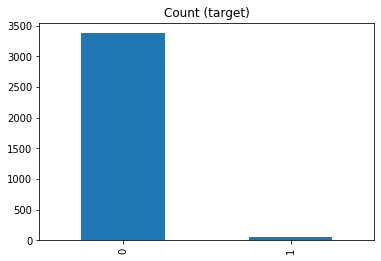

In [62]:
# load the data
data = pd.read_csv('AID362red_train.csv')
# convert strings into boolean values
class_feature = {'Active': 1,'Inactive': 0}
data.Outcome = [class_feature[item] for item in data.Outcome] 
print(data)
target_count = data.Outcome.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)') # plot the graph

# Model
Check the accuracy of imbalanced dataset

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = data.columns[2:]

X = data[labels]
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


Confusion matrix:
 [[672   0]
 [  0  13]]


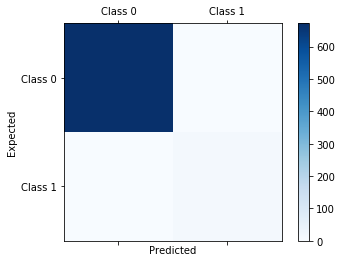

In [65]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Random over-sampling:
1    3375
0    3375
Name: Outcome, dtype: int64


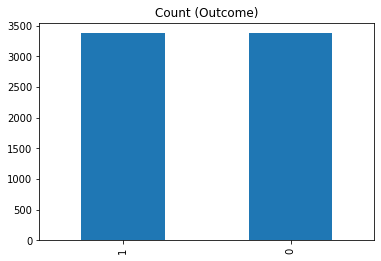

In [73]:
# Class count
count_class_0, count_class_1 = data.Outcome.value_counts()

# Divide by class
df_class_0 = data[data['Outcome'] == 0]
df_class_1 = data[data['Outcome'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Outcome.value_counts())

df_test_over.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)')